In [1]:
import pandas as pd
import numpy as np
import folium 
import sklearn
import geocoder
from geopy.geocoders import Nominatim
import requests
import matplotlib.pyplot as plt

In [2]:
mumbai_areas=pd.read_html("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai")[0]

In [3]:
mumbai_areas.Location.unique()

array(['Andheri,Western Suburbs', 'Western Suburbs',
       'Mira-Bhayandar,Western Suburbs', 'Bandra,Western Suburbs',
       'Borivali (West),Western Suburbs', 'Goregaon,Western Suburbs',
       'Kandivali West,Western Suburbs', 'Kandivali East,Western Suburbs',
       'Khar,Western Suburbs', 'Malad,Western Suburbs',
       'Sanctacruz,Western Suburbs', 'Vasai,Western Suburbs',
       'Vile Parle,Western Suburbs', 'Eastern Suburbs',
       'Ghatkopar,Eastern Suburbs', 'Kurla,Eastern Suburbs',
       'Mulund,Eastern Suburbs', 'Powai,Eastern Suburbs',
       'Harbour Suburbs', 'Govandi,Harbour Suburbs',
       'Trombay,Harbour Suburbs', 'South Mumbai',
       'Antop Hill,South Mumbai', 'Byculla,South Mumbai',
       'Colaba,South Mumbai', 'Dadar,South Mumbai', 'Fort,South Mumbai',
       'Kalbadevi,South Mumbai', 'Kamathipura,South Mumbai',
       'Tardeo,South Mumbai', 'Mumbai'], dtype=object)

### What areas have most neighborhoods

In [4]:
area_count=mumbai_areas.groupby('Location').count().sort_values(by='Latitude',ascending=False) #South Mumbai has a lot more areas than others

area_count

,Area,Latitude,Longitude
Location,,,
South Mumbai,30,30,30
"Andheri,Western Suburbs",8,8,8
Western Suburbs,6,6,6
Eastern Suburbs,4,4,4
"Kandivali West,Western Suburbs",3,3,3
"Bandra,Western Suburbs",3,3,3
"Powai,Eastern Suburbs",3,3,3
"Ghatkopar,Eastern Suburbs",3,3,3
"Mira-Bhayandar,Western Suburbs",3,3,3


### Bar chart of the neighborhood distribution

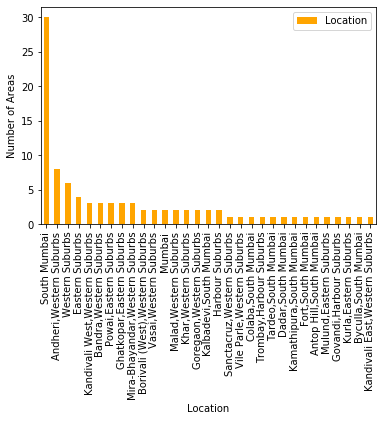

In [5]:
area_count.Area.plot(kind='bar',color='orange',label='Location')
plt.ylabel('Number of Areas')
plt.legend()

### Foursquare credentials 

In [6]:
CLIENT_ID = '5RIDO0Y4INEHAHNNSJD45W01CGWQ02DVBWAJZVCB5TZYRMYK' # your Foursquare ID
CLIENT_SECRET = '0JLESGKZCSVJRE2KMAMAE3P3AMLOJ41TK5C5KHK5YDYLM0T3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5RIDO0Y4INEHAHNNSJD45W01CGWQ02DVBWAJZVCB5TZYRMYK
CLIENT_SECRET:0JLESGKZCSVJRE2KMAMAE3P3AMLOJ41TK5C5KHK5YDYLM0T3


In [7]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius



In [8]:
# url='api.foursquare.com.v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(client_id,client_secret,version,ll[0],ll[1],radius,limit)

In [9]:
mumbai_areas['Coordinates']=[x for x in zip(mumbai_areas.Latitude,mumbai_areas.Longitude)]

In [10]:
mumbai_areas.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [11]:
def get_url(x):
    ll=x
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        ll[0],ll[1],radius, 
        LIMIT)
    return url

In [12]:
urls=mumbai_areas.loc[:,'Coordinates'].map(get_url)

In [13]:
# def get_category(df):
#     series=df.loc[:,'venue.categories'].map(lambda x : x[0]['name'])
#     return series.tolist()

In [14]:
len_ind=[]

for x in urls:
    try:
         len_ind.append(len(requests.get(x).json()['response']['groups'][0]['items']))
    except:
        print(x)

In [15]:
len_ind=np.array(len_ind)
ind=np.where(len_ind!=0)

In [16]:
urls=urls.map(lambda x : requests.get(x).json()['response']['groups'][0]['items'])

In [17]:
urls=urls[ind[0]]

In [18]:
neighborhood_categories=[]

for items in urls:
    
    cats=[]
    for x in range(len(items)):
        cats.append(items[x]['venue']['categories'][0]['name'])
    neighborhood_categories.append(cats)

In [19]:
neighbor_cats_df=pd.DataFrame(neighborhood_categories)

In [20]:
mumbai_areas=mumbai_areas.iloc[ind[0],:]

In [21]:
neighbor_cats_df.index=mumbai_areas.index

In [22]:
area_venue_cat=pd.concat([mumbai_areas,neighbor_cats_df],axis=1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [106]:
categories=np.array(list(set(area_venue_cat.iloc[:,3:].values.tolist()[59])))

venue_cats=area_venue_cat.iloc[:,3:].fillna('0')



In [107]:
ls=[]
for x in area_venue_cat.values.tolist():
    ls+=x

    
categories=list(set(ls))

In [108]:
# # pd.get_dummies(area_venue_cat)

ohe=OneHotEncoder(sparse=False)

enc_fit=ohe.fit(np.array(categories).reshape(-1,1))

enc=enc_fit.transform(venue_cats.values.reshape(-1,1))

In [117]:
enc_fit.categories_

[array(['0', 'ATM', 'Advertising Agency', 'Afghan Restaurant',
        'American Restaurant', 'Amphitheater', 'Antique Shop', 'Aquarium',
        'Arcade', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant',
        'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Beach',
        'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Bengali Restaurant',
        'Big Box Store', 'Bistro', 'Bookstore', 'Boutique',
        'Bowling Alley', 'Breakfast Spot', 'Brewery', 'Bridal Shop',
        'Buffet', 'Burger Joint', 'Bus Station', 'Café', 'Chaat Place',
        'Cheese Shop', 'Chinese Restaurant', 'Clothing Store',
        'Club House', 'Cocktail Bar', 'Coffee Shop', 'College Auditorium',
        'Comedy Club', 'Concert Hall', 'Convenience Store',
        'Cosmetics Shop', 'Creperie', 'Cricket Ground', 'Cupcake Shop',
        'Dance Studio', 'Deli / Bodega', 'Department Store',
        'Dessert Shop', 'Dhaba', 'Dim Sum Restaurant', 'Diner', 'Dog Run',
        'Donut Shop', 'Electronics